IMPORTING LIBRARIES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('hotel_bookings 2.csv')
df=pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21-10-2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [19]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [23]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [27]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [31]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [32]:
df.drop(['company','agent'],axis=1,inplace=True)

In [33]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
days_in_waiting_list                  0
customer_type                         0


In [35]:
df.dropna(inplace=True)

In [37]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776
mean,0.380345,102.144219,2016.142659,27.125299,12.877437,0.932316,2.506285,1.873076,0.102211,0.008273,0.030635,0.096374,0.135005,0.209531,1.627822,101.747121,0.061784,0.574846,2016-07-30 02:43:02.247306240
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,27.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,159.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,0.000000,1.000000,2017-03-04 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,25.000000,68.000000,20.000000,259.000000,510.000000,3.000000,5.000000,2017-12-09 00:00:00
std,0.485477,102.191260,0.723538,13.663305,10.101704,0.989412,1.911009,0.650838,0.398456,0.091288,0.172330,0.740802,1.510430,0.620846,13.717929,47.452396,0.242534,0.790726,NaN


In [42]:
per=df['is_canceled'].value_counts(normalize=True)
print(per*100)

is_canceled
0    61.965538
1    38.034462
Name: proportion, dtype: float64


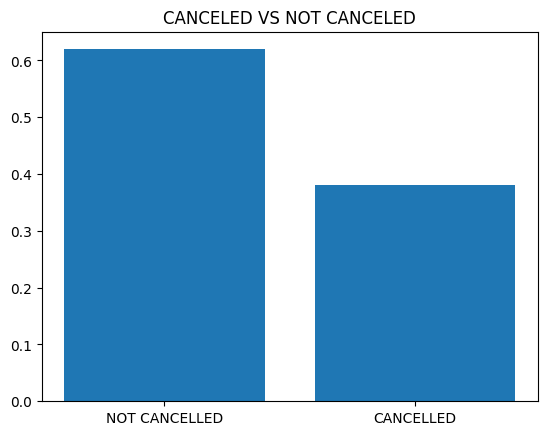

In [45]:
plt.title("CANCELED VS NOT CANCELED")
plt.bar(['NOT CANCELLED','CANCELLED'],per)
plt.show()

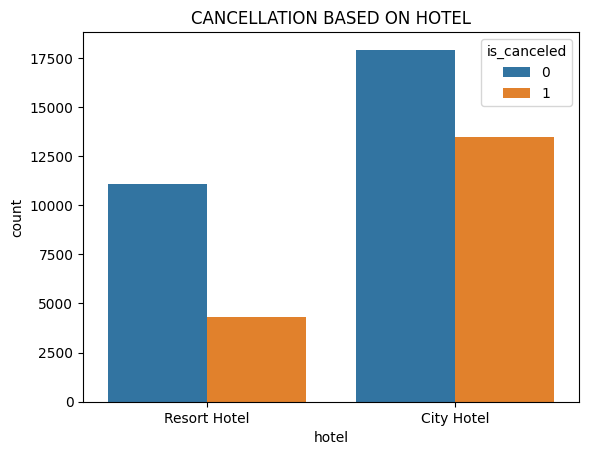

In [119]:
plt.title("CANCELLATION BASED ON HOTEL")
ax=sns.countplot(data=df,x='hotel',hue='is_canceled')
plt.show()

In [59]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.720195
1    0.279805
Name: proportion, dtype: float64

In [66]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.570428
1    0.429572
Name: proportion, dtype: float64

In [68]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

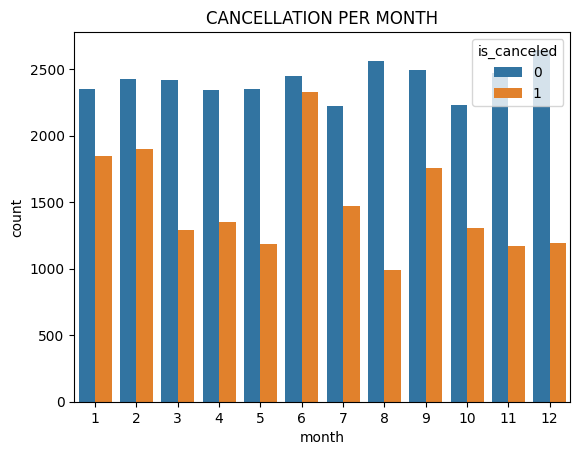

In [120]:
plt.title("CANCELLATION PER MONTH")
df['month']=df['reservation_status_date'].dt.month
asp=sns.countplot(data=df,x='month',hue='is_canceled')
plt.show()

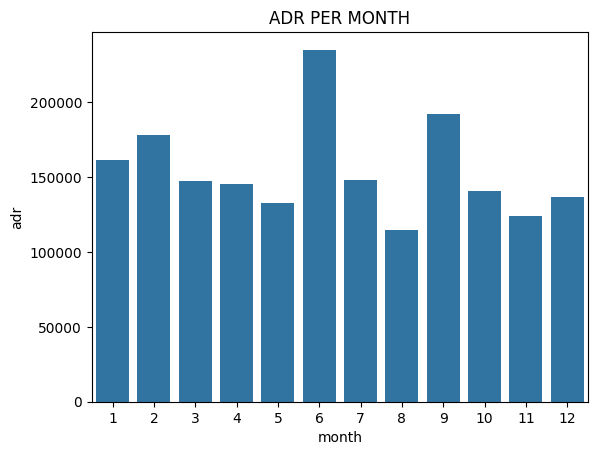

In [87]:
#ADR PER MONTH
plt.title("ADR PER MONTH")
sns.barplot(x='month',y='adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

country
PRT    11233
GBR      938
FRA      821
ESP      802
ITA      558
DEU      500
BRA      350
IRL      332
USA      209
BEL      180
Name: count, dtype: int64


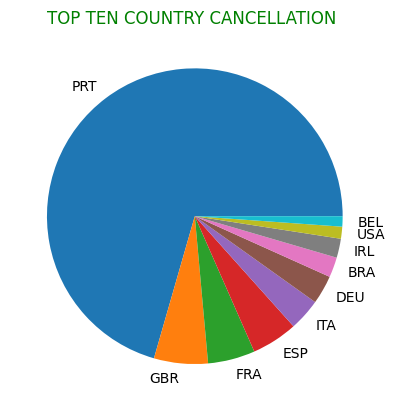

In [118]:
plt.title("TOP TEN COUNTRY CANCELLATION ",color='green')
cancel_data=df[df['is_canceled']==1]
top_ten_country=cancel_data['country'].value_counts()[0:10]
print(top_ten_country)
plt.pie(top_ten_country,labels=top_ten_country.index)
plt.show()


In [105]:
#online vs offline cancellation
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.478643
Offline TA/TO    0.200872
Groups           0.165427
Direct           0.105097
Corporate        0.041859
Complementary    0.006221
Aviation         0.001881
Name: proportion, dtype: float64

In [108]:
#cancellation on basis of online or offline
cancel_onof=cancel_data['market_segment'].value_counts(normalize=True)
print(cancel_onof)

market_segment
Online TA        0.462706
Groups           0.279973
Offline TA/TO    0.185824
Direct           0.041144
Corporate        0.026699
Complementary    0.001967
Aviation         0.001686
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x24d26675f40>,
 [Text(0.12858467248888283, 1.0924586866334702, 'Online TA'),
  Text(-0.878854201749556, -0.6615249746359929, 'Groups'),
  Text(0.5634577128446422, -0.9447303349823615, 'Offline TA/TO'),
  Text(1.0441697233926097, -0.3459907350641069, 'Direct'),
  Text(1.0937286691678232, -0.11729278852675816, 'Corporate'),
  Text(1.0998452249715027, -0.018452130158461925, 'Complementary'),
  Text(1.0999845648821562, -0.005827265311769747, 'Aviation')])

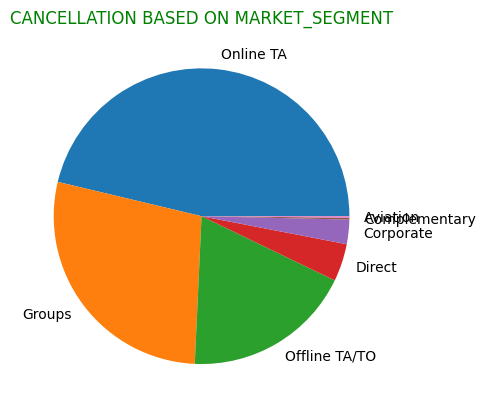

In [115]:
plt.title("CANCELLATION BASED ON MARKET_SEGMENT",color="green")
plt.pie(cancel_onof,labels=cancel_onof.index)